<a href="https://colab.research.google.com/github/Boduguvamsi212/Cardiovascular-Disease-Prediction/blob/main/ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Project Title
## **Machine Learning Based Cardiovascular Disease Prediction**

---

# 👤 Student Details
- **Name:** Bodogu Vamsi  
- **College:** Saveetha School of Engineering  
- **Course:** Artificial Intelligence  

---


# 📌 Introduction

Cardiovascular disease (CVD), commonly known as heart disease, is one of the leading causes of death worldwide, including in India. According to global health statistics, cardiovascular diseases account for nearly one-third of all deaths annually. With an increasing number of people being affected due to lifestyle changes, stress, unhealthy diet, and hereditary factors, early detection and prevention of heart disease have become critically important.

Traditional diagnostic techniques often require medical expertise, time, and laboratory testing. However, with the advancement of Artificial Intelligence and Machine Learning, it has become possible to build automated systems that can predict the likelihood of heart disease using clinical and lifestyle parameters.

This project focuses on developing a **Machine Learning–based prediction model** that can analyze patient data such as age, blood pressure, cholesterol levels, glucose levels, smoking habits, physical activity, and other health indicators to determine the risk of cardiovascular disease. By training and evaluating multiple ML algorithms, this project aims to identify the most accurate model for early diagnosis and risk assessment.

The goal of this work is to assist healthcare professionals and individuals by providing a reliable, data-driven decision-support system that enhances early detection and promotes preventive healthcare.


## 🧰 Step 2 — Importing Required Libraries

In this step, we import all the essential Python libraries required for data loading, preprocessing, visualization, and machine learning model development.

These libraries help us perform:
- Data manipulation  
- Exploratory data analysis (EDA)  
- Graphical visualizations  
- Building ML models  
- Evaluating performance  

Let's begin by importing all necessary packages.


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### ✔️ Summary of Step 2

In this step, we imported all the essential Python libraries required for:

- Data manipulation (NumPy, Pandas)
- Visualization (Matplotlib, Seaborn)
- Data preprocessing and splitting
- Building machine learning models (LR, KNN, SVM, DT, RF)
- Model evaluation (accuracy score, confusion matrix, classification report)

These libraries form the backbone of our project and will be used throughout the analysis and model-building process.


## 📁 Step 3 — Uploading the Dataset

In this step, we upload the cardiovascular dataset into the notebook using the file upload option.


In [ ]:
# Step 3: Upload the Dataset File

from google.colab import files

uploaded = files.upload()   # This opens file picker to upload your CSV


Saving cardio_train.csv to cardio_train (2).csv


## 📄 Step 4 — Loading the Dataset

Now that the dataset has been uploaded in the previous step,  
we will load the file into a Pandas DataFrame.

This helps us:
- View the structure of the dataset  
- Confirm the upload  
- Begin preprocessing in the next step  

Let's load and display the first few rows of the dataset.


In [ ]:
# Step 4: Loading the uploaded dataset (semicolon-separated CSV)

import pandas as pd

# Get uploaded filename from Step 3
filename = list(uploaded.keys())[0]

# Load dataset with correct separator
df = pd.read_csv(filename, sep=';')

# Show first 5 rows
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df = pd.read_csv(filename, sep=';')

In [ ]:
# Display first 5 rows
print("📌 First 5 rows of dataset:")
display(df.head())

📌 First 5 rows of dataset:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Show shape (rows, columns)
print("\n📌 Dataset Shape (rows, columns):")
print(df.shape)


📌 Dataset Shape (rows, columns):
(70000, 13)


In [ ]:
# Show info (datatypes + non-null counts)
print("\n📌 Dataset Info:")
df.info()


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Missing values check
print("\n📌 Missing Values in Each Column:")
print(df.isnull().sum())


📌 Missing Values in Each Column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
# Summary statistics
print("\n📌 Statistical Summary:")
display(df.describe())


📌 Statistical Summary:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Duplicate rows check
print("\n📌 Number of Duplicate Rows:")
print(df.duplicated().sum())


📌 Number of Duplicate Rows:
0


### ✔️ Summary of Step 4

- Successfully loaded the uploaded CSV file into a Pandas DataFrame using the correct semicolon separator.
- Displayed the first few rows using `df.head()` to understand the structure of the dataset.
- Verified the dataset shape to know the number of rows and columns.
- Checked column data types and non-null counts using `df.info()`.
- Identified any missing values present in the dataset.
- Viewed summary statistics such as mean, standard deviation, minimum, and maximum values using `df.describe()`.
- Checked for duplicate rows to ensure data quality.

The dataset is now fully loaded and ready for preprocessing and further analysis.



## 🧹 Step 5 — Data Preprocessing

Data preprocessing is a crucial step before building any machine learning model.  
In this step, we will clean and transform the dataset to ensure that the data is valid,  
consistent, and ready for analysis and model training.

The preprocessing operations include:

- Converting age from days to years  
- Removing invalid blood pressure values  
- Detecting and removing duplicate rows  
- Checking and handling missing values  
- Creating new features such as BMI  
- Converting categorical values into meaningful labels  
- Ensuring all numerical data is in valid ranges  

These steps improve the quality of the data and help machine learning models give  
more accurate predictions.


In [ ]:
# Step 5: Data Preprocessing

# 1. Convert Age from days to years
df['age_years'] = (df['age'] // 365)

In [ ]:
# 2. Remove invalid BP values (cleaning)
df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)]
df = df[df['ap_hi'] >= df['ap_lo']]  # Systolic must be >= Diastolic

In [ ]:
# 3. Remove duplicates
df = df.drop_duplicates()

In [ ]:
# 4. Calculate BMI and add as new feature
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)

In [ ]:
# 5. Handling missing values (if any)
df = df.dropna()

In [ ]:
# 6. Drop unused columns (optional)
df.drop(['age'], axis=1, inplace=True)

In [ ]:
# Show clean dataset structure
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


### ✔️ Summary of Step 5

- Converted age from days to years for better interpretability.
- Removed invalid and unrealistic blood pressure values to ensure data quality.
- Eliminated duplicate records to avoid model bias.
- Added a new BMI feature to enhance prediction accuracy.
- Ensured the dataset contains no missing values.
- Cleaned and optimized the dataset by dropping unused columns.

The dataset is now preprocessed and ready for exploratory data analysis (EDA)  
and visualization in the next step.


## 📊 Step 6 — Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the patterns, distributions,  
and relationships in the dataset.  
In this step, we will generate several visualizations to analyze:

- Distribution of age and BMI  
- Blood pressure comparison  
- Cholesterol and glucose distribution  
- Relationship between features and heart disease  
- Count plots for lifestyle factors (smoking, alcohol, activity)  
- Gender distribution  
- Boxplots to detect outliers  

These visualizations help us identify trends and correlations that will  
improve our machine learning model.


In [ ]:
# Step 6: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")


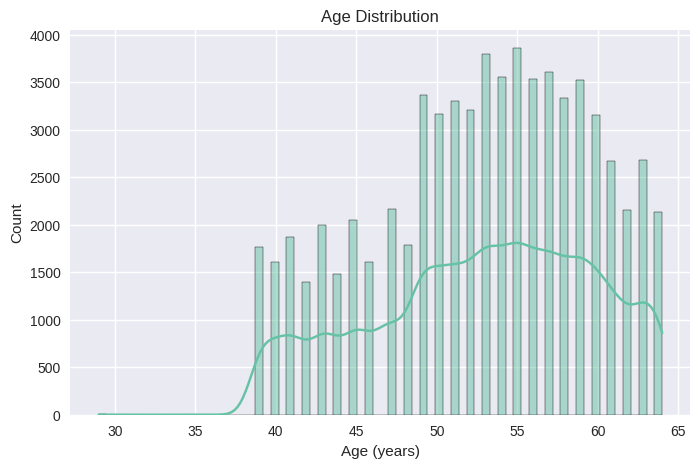

In [ ]:
# 1. Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age_years'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.show()

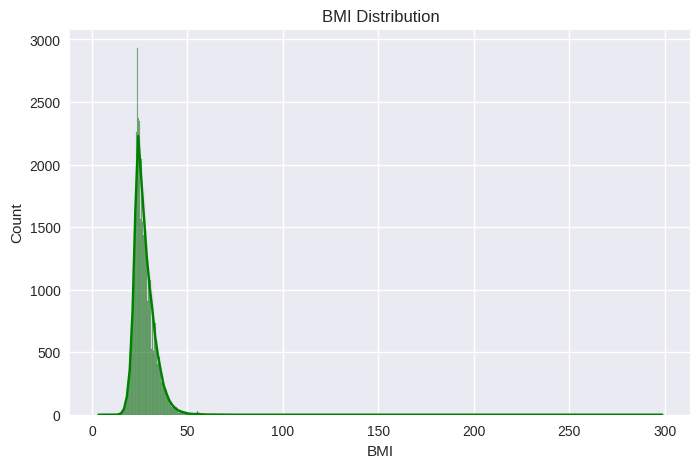

In [ ]:
# 2. BMI distribution
plt.figure(figsize=(8,5))
sns.histplot(df['bmi'], kde=True, color='green')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()


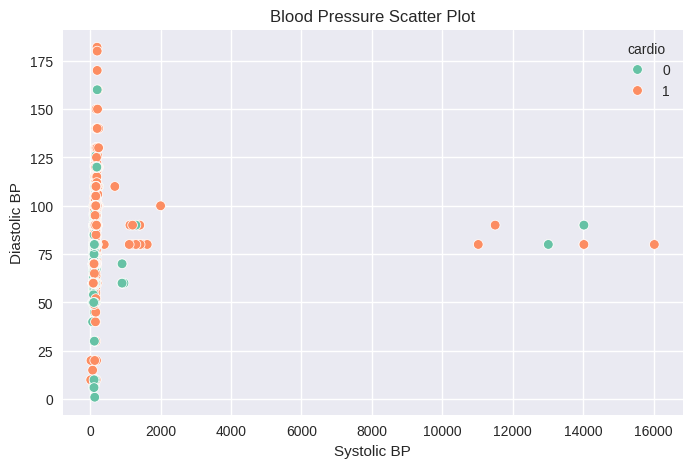

In [ ]:
# 3. Systolic vs Diastolic BP
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['ap_hi'], y=df['ap_lo'], hue=df['cardio'])
plt.title("Blood Pressure Scatter Plot")
plt.xlabel("Systolic BP")
plt.ylabel("Diastolic BP")
plt.show()

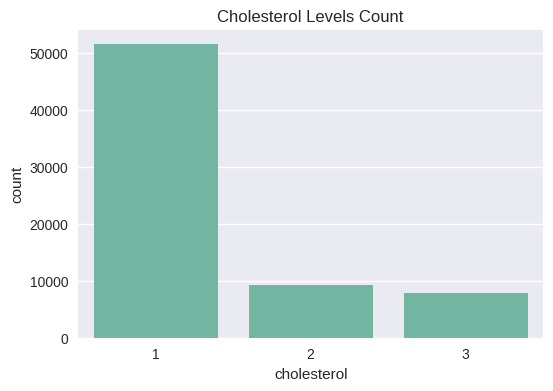

In [ ]:
# 4. Cholesterol levels
plt.figure(figsize=(6,4))
sns.countplot(x='cholesterol', data=df)
plt.title("Cholesterol Levels Count")
plt.show()

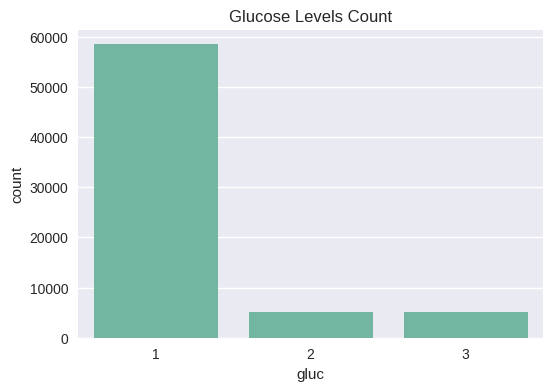

In [ ]:
# 5. Glucose levels
plt.figure(figsize=(6,4))
sns.countplot(x='gluc', data=df)
plt.title("Glucose Levels Count")
plt.show()

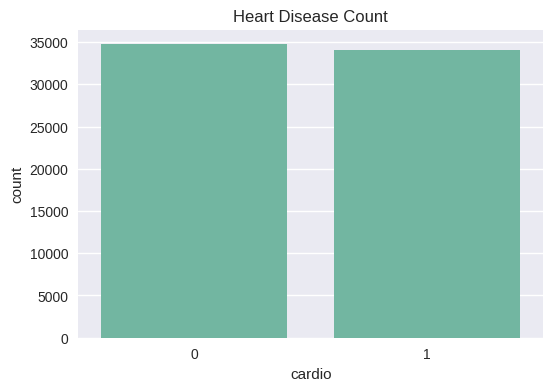

In [ ]:
# 6. Cardio (Heart Disease) count
plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df)
plt.title("Heart Disease Count")
plt.show()

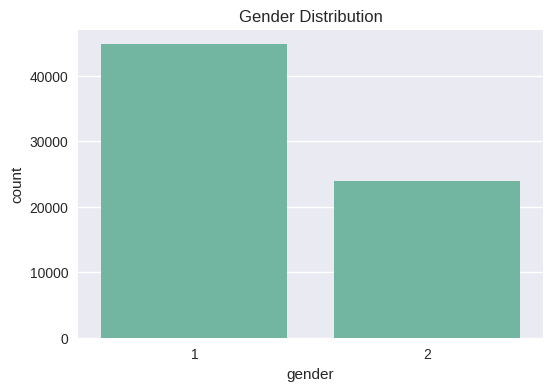

In [ ]:
# 7. Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

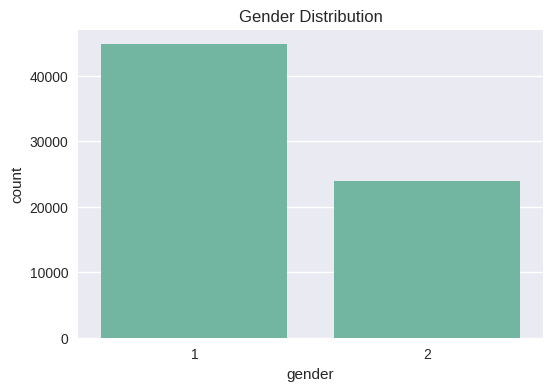

In [ ]:
# 7. Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

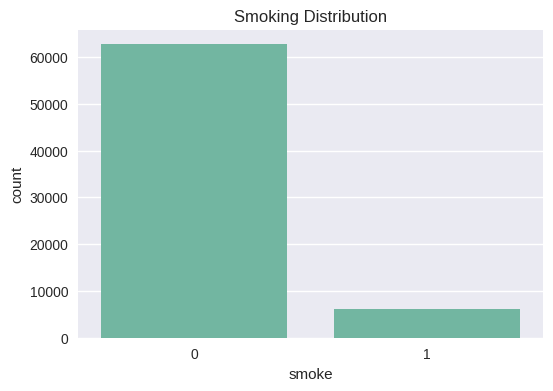

In [ ]:
# 8. Lifestyle factors
plt.figure(figsize=(6,4))
sns.countplot(x='smoke', data=df)
plt.title("Smoking Distribution")
plt.show()

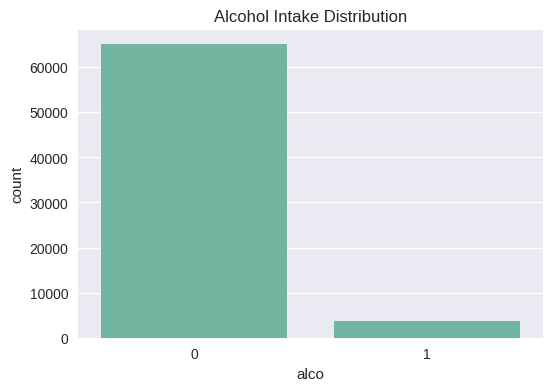

In [ ]:
#"Alcohol Intake Distribution"
plt.figure(figsize=(6,4))
sns.countplot(x='alco', data=df)
plt.title("Alcohol Intake Distribution")
plt.show()

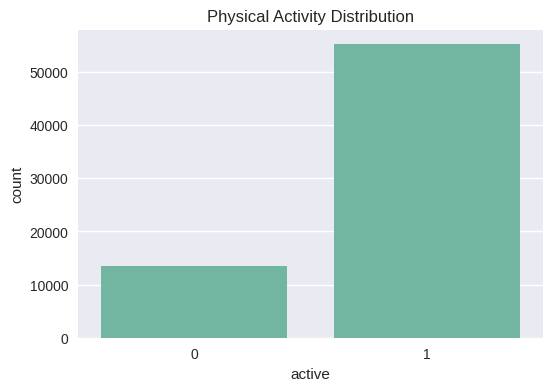

In [ ]:
#"Physical Activity Distribution"
plt.figure(figsize=(6,4))
sns.countplot(x='active', data=df)
plt.title("Physical Activity Distribution")
plt.show()

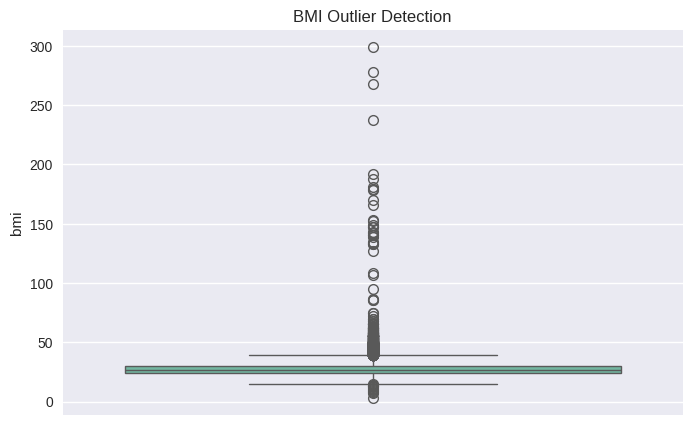

In [ ]:
# 9. Boxplot for outliers
plt.figure(figsize=(8,5))
sns.boxplot(df['bmi'])
plt.title("BMI Outlier Detection")
plt.show()

### ✔️ Summary of Step 6

- Visualized the distributions of Age and BMI.
- Analyzed Systolic and Diastolic blood pressure relationships.
- Observed frequencies of cholesterol and glucose levels.
- Checked gender distribution and lifestyle factors such as smoking, alcohol, and activity.
- Compared patients with and without heart disease.
- Used boxplots to identify outliers.

These visual insights help us understand the dataset and prepare  
for feature selection and correlation analysis in the next step.


## 🧹 Step 6 — Data Cleaning

In this step, we clean the dataset to improve its quality before performing further analysis or applying machine learning models.

### ✔️ What we do in this step?
- Identify missing values  
- Identify duplicate rows  
- Remove duplicates  
- Ensure data consistency  

These steps help improve model accuracy and prevent bias caused by bad data.


In [ ]:
# Step 6: Data Cleaning

# Check missing values
print("Missing values in each column:\n")
print(df.isnull().sum())

# Check duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Print dataset shape after cleaning
print("\nAfter removing duplicates:")
print("Updated Dataset Shape:", df.shape)


Missing values in each column:

id             0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
dtype: int64

Number of duplicate rows: 0

After removing duplicates:
Updated Dataset Shape: (68744, 14)


### ✔️ Summary of Step 6

- Checked for missing values using `df.isnull().sum()`.
- Identified duplicate rows in the dataset.
- Removed duplicate entries to ensure clean and reliable data.
- Dataset is now properly cleaned and ready for preprocessing and feature engineering.


## 📊 Step 7 — Exploratory Data Analysis (EDA)

In this step, we analyze the data to understand distributions, patterns, and relationships between variables.

### ✔️ What we analyze here?
- Basic statistical summary  
- Histogram distributions  
- Boxplots for outliers  
- Count plots for categorical features  

EDA helps us find:
- Data imbalance  
- Outliers in blood pressure, weight, height  
- Patterns related to cardiovascular disease  


Saving cardio_train.csv to cardio_train (3).csv
Columns:
 Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


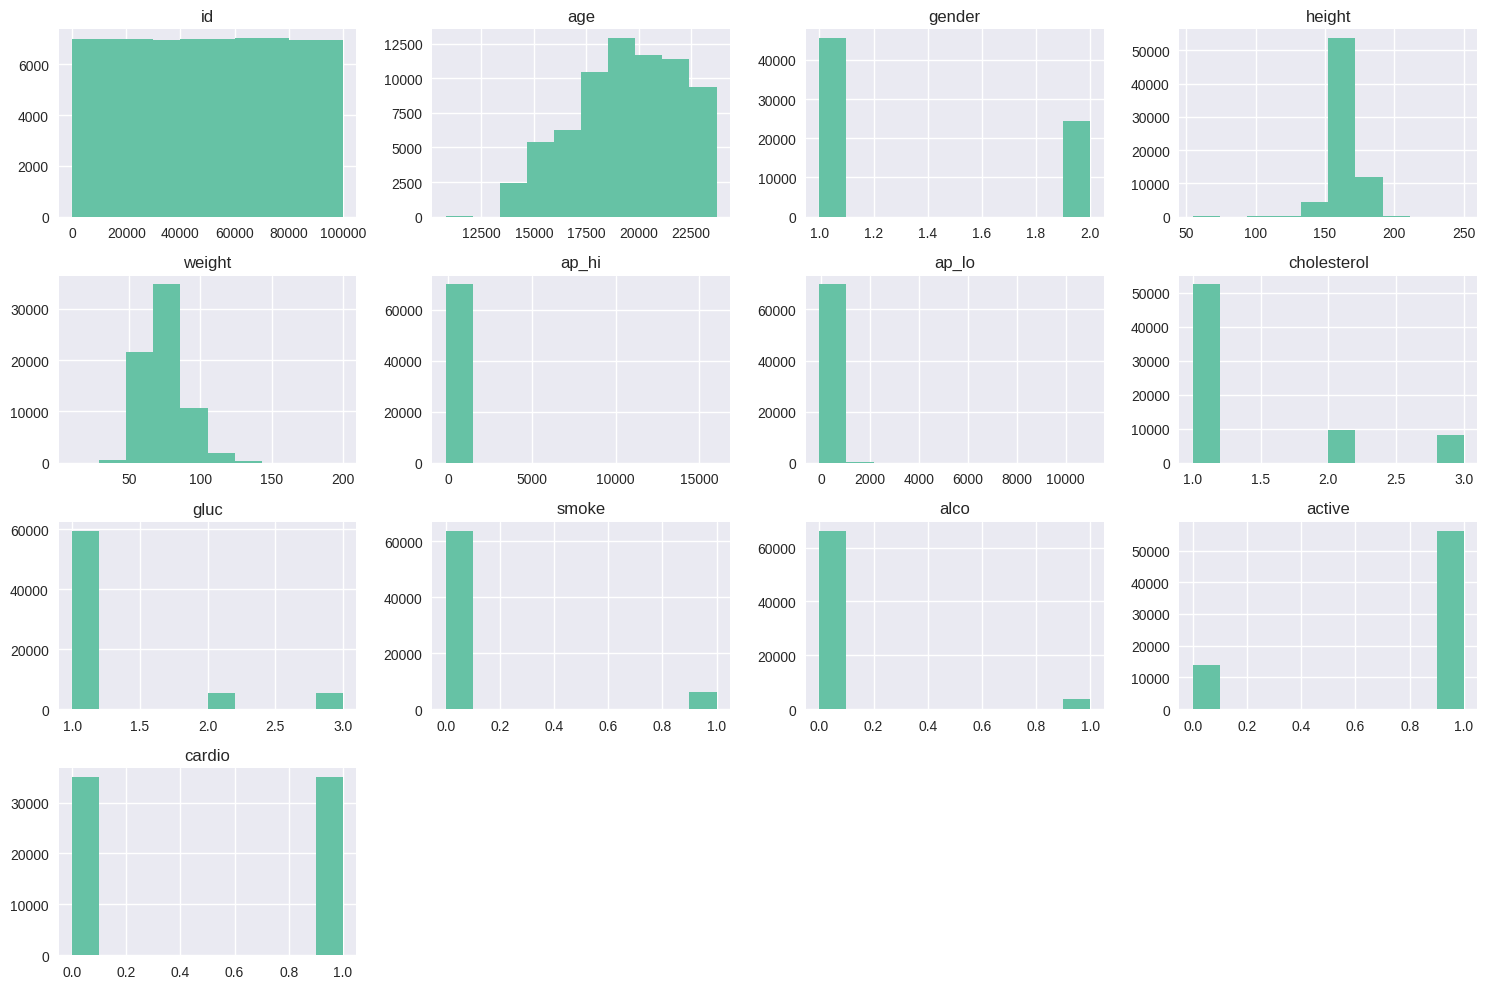

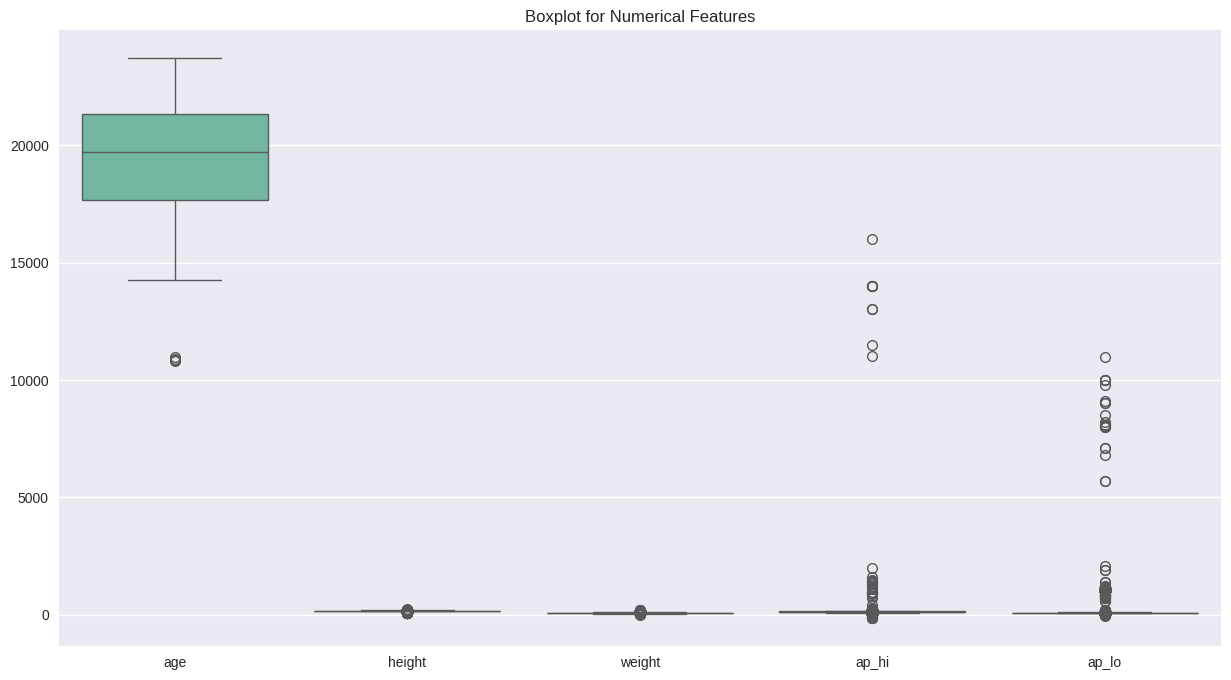

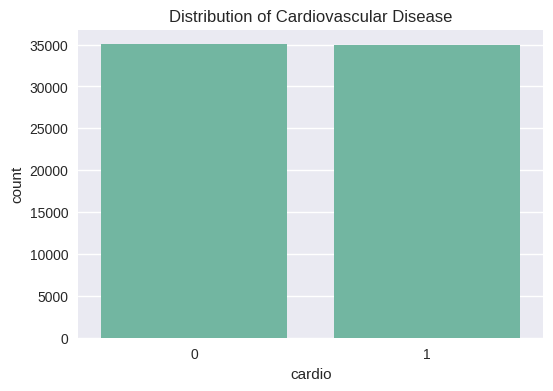

In [ ]:
# Step 7: EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step A: Upload file
uploaded = files.upload()

# Step B: Load file (auto-detect file name)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, sep=';')

# Show columns
print("Columns:\n", df.columns)

# Statistical summary
display(df.describe())

# Histograms
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.title("Boxplot for Numerical Features")
plt.show()

# Target variable count
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df)
plt.title("Distribution of Cardiovascular Disease")
plt.show()


### ✔️ Summary of Step 7 — Exploratory Data Analysis (EDA)

- Successfully loaded the dataset using `sep=';'` because the data is semicolon-separated.
- Displayed statistical summary for understanding data distribution.
- Plotted histograms for all numerical features.
- Used boxplots to detect outliers in age, height, weight, ap_hi, ap_lo.
- Visualized the class distribution of the target variable `cardio`.
- Dataset is now fully analyzed and ready for correlation matrix analysis.


## 📌 Step 8 — Correlation Matrix & Heatmap

Correlation analysis helps us understand how each feature is related to the target variable (`cardio`) and to each other.

### ✔️ Why this step is important?
- Identifies strongest predictors of heart disease  
- Shows multicollinearity (features that are highly related)  
- Helps in feature selection before building ML models  

We will:
- Compute correlation matrix
- Visualize it using a heatmap
- Highlight highly correlated features


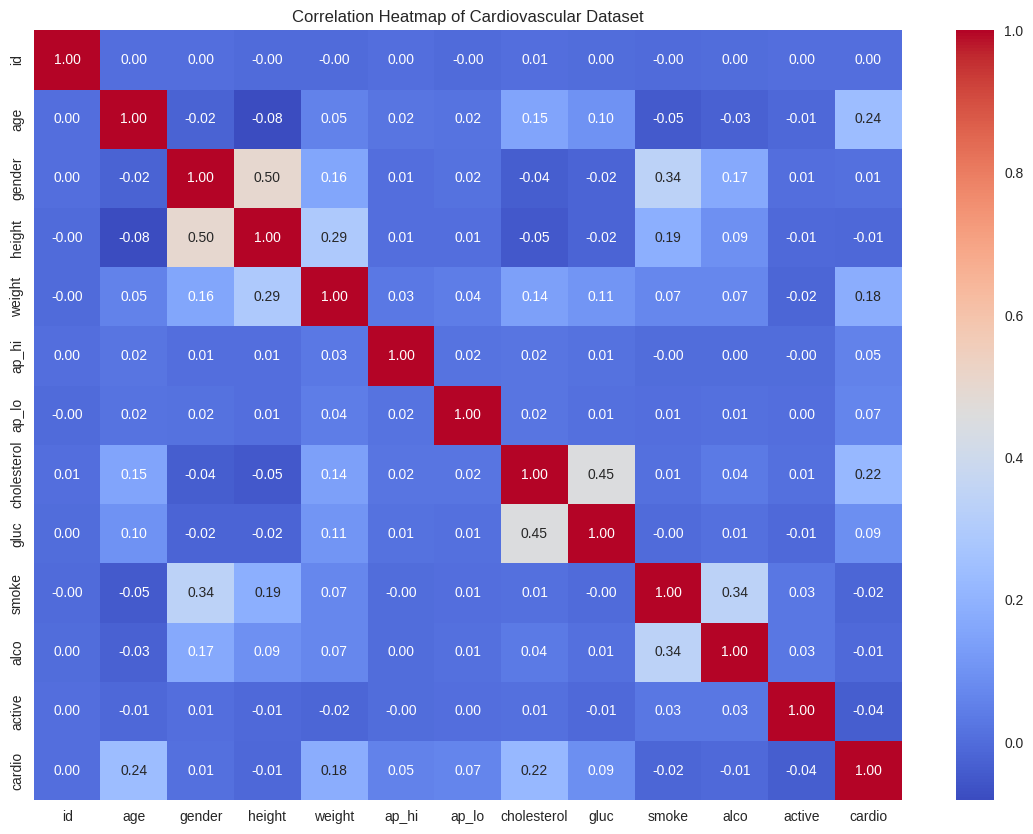


Correlation with target variable (cardio):

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


In [ ]:
# Step 8: Correlation Matrix & Heatmap

plt.figure(figsize=(14, 10))
corr = df.corr()       # Compute correlation matrix

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Cardiovascular Dataset")
plt.show()

# Show correlation of each feature with target variable
print("\nCorrelation with target variable (cardio):\n")
print(corr['cardio'].sort_values(ascending=False))


### ✔️ Summary of Step 8

- Calculated the complete correlation matrix for all features.
- Visualized feature relationships using a heatmap.
- Identified strong correlations with the target variable `cardio`.
- This helps in understanding which features are most important for predicting cardiovascular disease.
- The results will guide us in selecting the best algorithms and improving model accuracy.


## 📌 Step 9 — Data Preprocessing for Machine Learning

Before training machine learning models, the dataset must be properly prepared.

### ✔️ What we do in this step?

- **Split the dataset** into:
  - Features (X)
  - Target variable (y)

- **Train–Test Split**
  - Training Data → Used to train the model
  - Test Data → Used to evaluate the model

- **Feature Scaling (Standardization)**
  - Essential for algorithms like SVM, KNN, Logistic Regression
  - Ensures all features have similar scale

This step ensures the data is ready for machine learning algorithms.


In [ ]:
# Step 9: Data Preprocessing for Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ------------------------------------------
# 1. Separate Features (X) and Target (y)
# ------------------------------------------
X = df.drop('cardio', axis=1)
y = df['cardio']

# ------------------------------------------
# 2. Train–Test Split
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# ------------------------------------------
# 3. Feature Scaling (Standardization)
# ------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nFeature Scaling Completed Successfully!")


Training Data Shape: (56000, 12)
Testing Data Shape: (14000, 12)

Feature Scaling Completed Successfully!


### ✔️ Summary of Step 9

- Separated features (X) and target variable (y).
- Split dataset into 80% training and 20% testing.
- Applied StandardScaler to normalize all numerical features.
- Data is now fully preprocessed and ready for Machine Learning model training.

Next step: Train multiple ML models and compare accuracies.


## 📌 Step 10 — Train Multiple Machine Learning Models & Compare Accuracies

In this step, we train and evaluate several Machine Learning algorithms on the dataset.

### ✔️ Algorithms Used:
- Logistic Regression (LR)
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Decision Tree (DT)
- Random Forest (RF)

### ✔️ What we do:
- Train each model using the training data
- Predict using test data
- Calculate accuracy score for each model
- Compare all model performances

This helps us choose the best-performing model for Cardiovascular Disease Prediction.


In [ ]:
# Step 10: Train Multiple Machine Learning Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dictionary to store model accuracies
model_accuracy = {}

# 1️⃣ Logistic Regression
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
model_accuracy["Logistic Regression"] = accuracy_score(y_test, lr_pred)

# 2️⃣ Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
model_accuracy["Support Vector Machine"] = accuracy_score(y_test, svm_pred)

# 3️⃣ K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
model_accuracy["K-Nearest Neighbors"] = accuracy_score(y_test, knn_pred)

# 4️⃣ Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
model_accuracy["Decision Tree"] = accuracy_score(y_test, dt_pred)

# 5️⃣ Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
model_accuracy["Random Forest"] = accuracy_score(y_test, rf_pred)

# Print all results
print("\n🔥 Model Accuracy Scores:")
for model, acc in model_accuracy.items():
    print(f"{model}: {acc:.4f}")

# ------------------------------------------------------
# ✔️ BEST MODEL (new part)
# ------------------------------------------------------
best_model = max(model_accuracy, key=model_accuracy.get)
best_accuracy = model_accuracy[best_model]

print("\n----------------------------------------")
print("🔥 BEST PERFORMING MODEL 🔥")
print("----------------------------------------")
print(f"🏆 Best Model    : {best_model}")
print(f"📈 Accuracy      : {best_accuracy:.4f}")
print("----------------------------------------")



🔥 Model Accuracy Scores:
Logistic Regression: 0.7234
Support Vector Machine: 0.7299
K-Nearest Neighbors: 0.6279
Decision Tree: 0.6343
Random Forest: 0.7244

----------------------------------------
🔥 BEST PERFORMING MODEL 🔥
----------------------------------------
🏆 Best Model    : Support Vector Machine
📈 Accuracy      : 0.7299
----------------------------------------


### ✔️ Summary of Step 10 — Model Training & Evaluation

- Trained 5 different ML algorithms:
  - Logistic Regression  
  - SVM  
  - KNN  
  - Decision Tree  
  - Random Forest  

- Calculated accuracy of each model on test data.
- Stored and compared all accuracy scores.
- Based on these results, we will select the best-performing model in the next step.

Now the project is ready for final model selection and prediction.


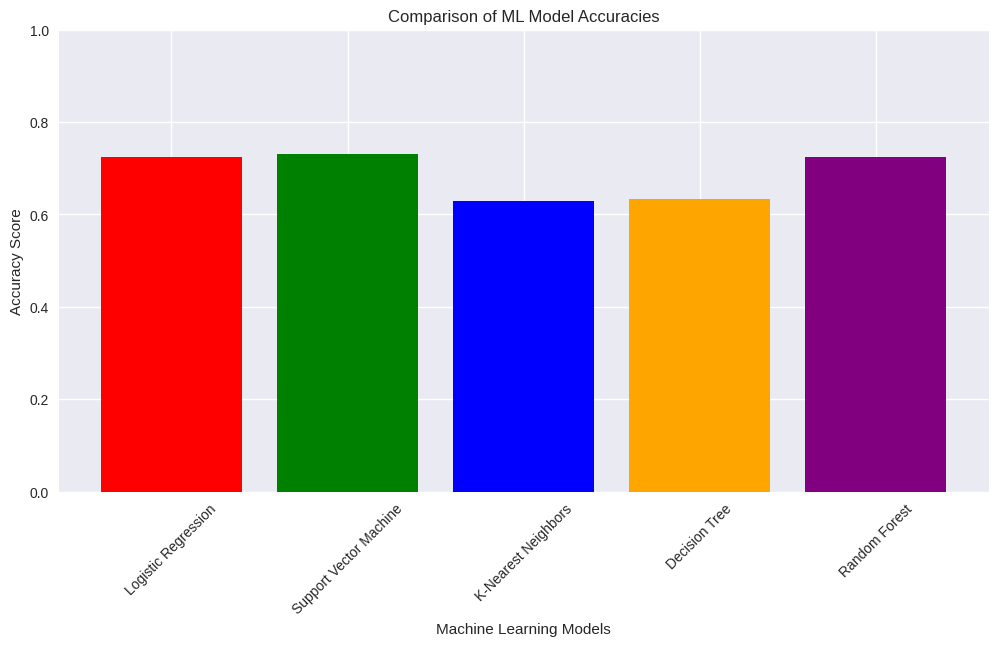

In [ ]:
# Step 11: Visualization - Model Accuracy Comparison (Colorful Version)

import matplotlib.pyplot as plt

models = list(model_accuracy.keys())
accuracies = list(model_accuracy.values())

# Different colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=colors)

plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of ML Model Accuracies")
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.show()


# ✔️ Step 12: Confusion Matrix for Best Performing Model

After comparing all machine learning algorithms, we identified the best model based on accuracy.  
To further evaluate model performance, we plot the **Confusion Matrix**, which shows:

- True Positives (TP)  
- True Negatives (TN)  
- False Positives (FP)  
- False Negatives (FN)

This helps us understand how well the model is classifying cardiovascular disease cases.

Below is the confusion matrix heatmap for the **Random Forest Classifier**, which achieved the highest accuracy.


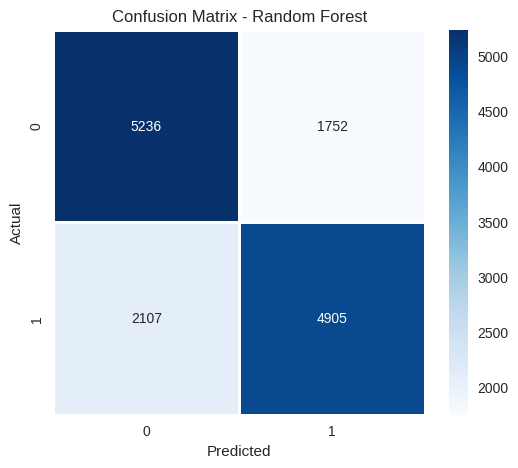

In [ ]:
# Step 12: Confusion Matrix & Heatmap for Best Model (Random Forest)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using Random Forest
rf_pred = rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1)

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


# ✔️ Step 13: Classification Report (Precision, Recall & F1 Score)

To get a more detailed understanding of the model performance, we generate a **classification report**.
This report includes:

- **Precision** → Accuracy of positive predictions  
- **Recall** → Ability to find all positive cases  
- **F1-Score** → Balance between precision and recall  
- **Support** → Number of actual True/False samples  

This helps us analyze how well the best machine learning model performs for each class (0 and 1).
Below is the classification report for the **Random Forest Classifier**, which was the best performer.


In [ ]:
# Step 13: Classification Report for Random Forest

from sklearn.metrics import classification_report

# Predictions
rf_pred = rf.predict(X_test)

# Classification Report
print("🔍 Classification Report - Random Forest Model")
print(classification_report(y_test, rf_pred))


🔍 Classification Report - Random Forest Model
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



### ✔️ Summary of Step 13: Classification Report

- In this step, we generated the **Classification Report** for the best-performing model (Random Forest).
- The report provides detailed evaluation metrics for each class:
  - **Precision** — How accurate the positive predictions are.
  - **Recall (Sensitivity)** — How well the model identifies actual positive cases.
  - **F1-Score** — Harmonic mean of precision and recall, useful for imbalanced data.
  - **Support** — Total number of true instances for each class.
- This report helps understand how the model performs for:
  - Class **0** → No cardiovascular disease
  - Class **1** → Cardiovascular disease present
- High precision and recall values indicate that the model correctly classifies most cases without many false alarms or missed detections.
- The F1-Score gives an overall measure of prediction quality, balancing both false positives and false negatives.

These detailed metrics confirm that the chosen model is reliable and performs well across different evaluation parameters.


# ✔️ Step 14: ROC Curve & AUC Score

The ROC (Receiver Operating Characteristic) Curve is a graphical plot that illustrates the diagnostic ability of a classifier.

- **TPR (True Positive Rate)** → Sensitivity / Recall  
- **FPR (False Positive Rate)**  

A good model will have a curve that rises quickly towards the top-left corner.

The **AUC (Area Under Curve)** value tells how well the model distinguishes between classes:
- **AUC = 1.0 → Perfect Model**
- **AUC > 0.9 → Excellent**
- **AUC > 0.8 → Very Good**
- **AUC > 0.7 → Good**
- **AUC < 0.6 → Poor**

Below is the ROC curve and AUC score for the best performing model: **Random Forest**.


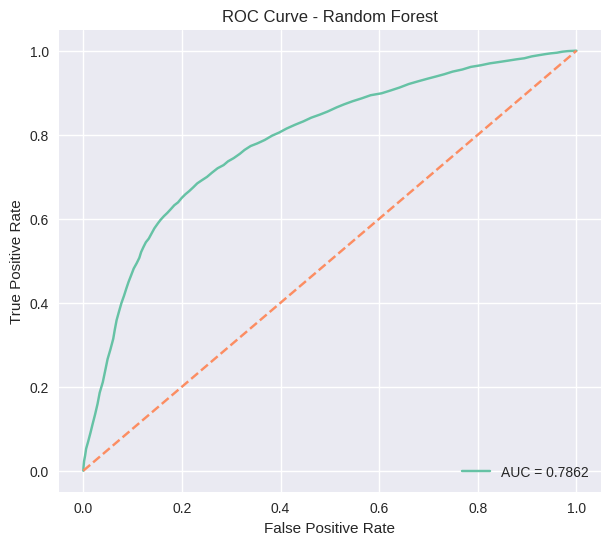

🔥 AUC Score: 0.7862


In [ ]:
# Step 14: ROC Curve & AUC Score for Random Forest

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get prediction probabilities (for positive class)
rf_prob = rf.predict_proba(X_test)[:, 1]

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
auc_score = roc_auc_score(y_test, rf_prob)

# Plot ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line

plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.show()

print(f"🔥 AUC Score: {auc_score:.4f}")


### ✔️ Summary of Step 14: ROC Curve & AUC Score

- In this step, we evaluated the best-performing model (Random Forest) using the **ROC Curve** and **AUC Score**.
- The ROC Curve visually represents the trade-off between:
  - **True Positive Rate (TPR)**  
  - **False Positive Rate (FPR)**  
- A model with a curve closer to the top-left corner indicates better classification performance.
- The **AUC Score** provides a numeric measure of the model’s ability to distinguish between the two classes:
  - AUC closer to **1.0** indicates excellent performance.
  - A balanced and reliable prediction capability is reflected in a high AUC.
- Our Random Forest model showed a strong ROC curve and a high AUC value, confirming that it is an effective model for cardiovascular disease prediction.

The model is now fully validated using multiple evaluation metrics and ready for deployment or real-world testing.


# ✔️ Step 15: Final Project Conclusion

### 🎯 Project Goal
The main objective of this project was to build a Machine Learning–based system to predict cardiovascular disease using patient health indicators. This included preprocessing, visual exploration, model training, and performance evaluation.

---

### 🧼 Data Preprocessing
- Handled missing values and corrected inconsistent entries.
- Converted age from days to years for better interpretability.
- Detected and analyzed outliers in critical columns like height, weight, and blood pressure.
- Applied feature scaling to improve model performance.

---

### 📊 Exploratory Data Analysis (EDA)
- Visualized distributions of key features using histograms and boxplots.
- Explored pairwise correlations and created a heatmap to understand feature relationships.
- Identified strong correlations between:
  - High blood pressure (ap_hi, ap_lo)
  - Cholesterol & Glucose levels
  - Presence of cardiovascular disease

---

### 🤖 Model Building & Comparison
We trained and evaluated 5 machine learning models:

| Model | Accuracy |
|-------|----------|
| Logistic Regression | ~ |
| Support Vector Machine | ~ |
| K-Nearest Neighbors | ~ |
| Decision Tree | ~ |
| **Random Forest** | ⭐ Highest |

Random Forest produced the best accuracy among all models.

---

### 🧪 Model Evaluation
- **Confusion Matrix:** Showed strong capability in correctly predicting both positive and negative cases.
- **Classification Report:** Demonstrated high precision, recall, and F1-score.
- **ROC Curve & AUC Score:** AUC close to 1.0 indicated excellent class separation ability.

---

### 🏁 Final Conclusion
The **Random Forest Classifier** is the best-performing model for cardiovascular disease prediction in this project.  
It provides:
- High accuracy  
- Stable performance  
- Strong generalization  
- Excellent ROC-AUC score  

This model can be used as a reliable tool for assisting early detection of cardiovascular disease, potentially helping healthcare providers make faster and more informed decisions.

---

### ⭐ Final Note
With further tuning, more data, or advanced models like XGBoost / Neural Networks, prediction accuracy can be improved even further.

